In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline
traffic =  pd.read_csv("traffic.csv", low_memory=False)


In [14]:
## Q1.1
traffic =  pd.read_csv("traffic.csv", low_memory=False)
print("***")
print("Q1.1")
print("Number of traffic survey entries: ", traffic.shape[0])
print("Number of attributes: ", traffic.shape[1])
print("")
types = traffic.dtypes
print(types)
print("***")


***
Q1.1
Number of traffic survey entries:  60168
Number of attributes:  28

date                      object
road_name                 object
location                  object
suburb                    object
speed_limit                int64
direction                 object
time                      object
vehicle_class_1          float64
vehicle_class_2          float64
vehicle_class_3          float64
vehicle_class_4          float64
vehicle_class_5          float64
vehicle_class_6          float64
vehicle_class_7          float64
vehicle_class_8          float64
vehicle_class_9          float64
vehicle_class_10         float64
vehicle_class_11         float64
vehicle_class_12         float64
vehicle_class_13         float64
motorcycle               float64
bike                     float64
average_speed            float64
85th_percentile_speed    float64
maximum_speed             object
road_segment               int64
road_segment_1           float64
road_segment_2           float64

In [15]:
# Q 1.2
traffic = traffic.loc[(traffic['maximum_speed'] != '-') & (traffic['maximum_speed']).notnull()]
traffic['maximum_speed'] = traffic['maximum_speed'].astype(float)

print("***")
print("Q1.2")
print("Number of remaining traffic survey entries: ", traffic.shape[0])
print("***")



***
Q1.2
Number of remaining traffic survey entries:  41510
***


In [12]:
print(traffic.head())

            date    road_name        location       suburb  speed_limit  \
436   23/11/2014  Hope Street  66 Hope Street  South Yarra           40   
763   23/11/2014  Hope Street  66 Hope Street  South Yarra           40   
1422  23/11/2014  Hope Street  66 Hope Street  South Yarra           40   
1876  23/11/2014  Hope Street  66 Hope Street  South Yarra           40   
1939  23/11/2014  Hope Street  66 Hope Street  South Yarra           40   

     direction  time  vehicle_class_1  vehicle_class_2  vehicle_class_3  \
436          N  3:00              0.0              0.0              0.0   
763          N  4:00              0.0              0.0              0.0   
1422         N  5:00              0.0              0.0              0.0   
1876         N  6:00              0.0              0.0              0.0   
1939         N  7:00              0.0              0.0              0.0   

           ...        vehicle_class_12  vehicle_class_13  motorcycle  bike  \
436        ...      

In [22]:
## Q1.3

median_val = traffic['vehicle_class_1'].median()
highest_val = traffic['maximum_speed'].max()

print("***")
print("Q1.3")
print("Median value of vehicle_class_1: ", median_val)
print("Highest value of maximum_speed: ", highest_val)
print("***")


***
Q1.3
Median value of vehicle_class_1:  24.0
Highest value of maximum_speed:  159.0
***


In [23]:
## Q 2.1
with open('roads.json') as f:
    roads_dict = json.load(f)
roads_data = roads_dict['data']
roads_tmp = [(r[9], r[14]) for r in roads_data]
roads = pd.DataFrame(roads_tmp, columns = ['road_segment' , 'StrType']) 

roads['road_segment'] = roads['road_segment'].astype(str)
traffic['road_segment'] = traffic['road_segment'].astype(str)
traffic = pd.merge(traffic, roads, on='road_segment', how='left')

print("***")
print("Q2.1")
print("The first three rows of traffic DataFrame with the attribute StrType are:")
print(traffic.head(3))
print("***")

***
Q2.1
The first three rows of traffic DataFrame with the attribute StrType are:
        date      road_name                                    location  \
0  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   
1  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   
2  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   

      suburb  speed_limit direction  time  vehicle_class_1  vehicle_class_2  \
0  Parkville           40         E  4:00              1.0              0.0   
1  Parkville           40         E  5:00              1.0              0.0   
2  Parkville           40         E  6:00              4.0              0.0   

   vehicle_class_3      ...        vehicle_class_13  motorcycle  bike  \
0              0.0      ...                     0.0         0.0   1.0   
1              0.0      ...                     0.0         0.0   0.0   
2              0.0      ...                     0.0         0.0   0.0   

   ave

In [24]:
# Q 2.2
traffic['speed_limit_float'] = traffic['speed_limit'].astype(float)
#traffic['speed_over_limit'] = traffic['average_speed'] - traffic['speed_limit_float']
traffic['max_speed_over_limit'] = traffic['maximum_speed'] - traffic['speed_limit_float']
# others

traffic['speed_limit'] = traffic['speed_limit'].astype(str)
traffic['speed_limit_int'] = traffic['speed_limit'].astype(int)

print("***")
print("Q2.2")
print("The first three rows of traffic DataFrame with the new max_speed_over_limit attribute are:")
print(traffic.head(3))
print("***")

***
Q2.2
The first three rows of traffic DataFrame with the new max_speed_over_limit attribute are:
        date      road_name                                    location  \
0  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   
1  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   
2  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   

      suburb speed_limit direction  time  vehicle_class_1  vehicle_class_2  \
0  Parkville          40         E  4:00              1.0              0.0   
1  Parkville          40         E  5:00              1.0              0.0   
2  Parkville          40         E  6:00              4.0              0.0   

   vehicle_class_3       ...         average_speed  85th_percentile_speed  \
0              0.0       ...                  18.2                   18.0   
1              0.0       ...                  44.7                   44.0   
2              0.0       ...                  27.4     

In [25]:
## Q2.3 

bygroup = traffic[traffic['StrType'] == 'Arterial'].groupby('road_name')
picture=bygroup['max_speed_over_limit'].max()
p = picture.sort_values(ascending=False).head(3)

print("***")
print("Q2.3")
print("Three Arterial roads with the highest maximum max_speed_over_limit:")
for i in range(0,3):
    print("%s: %d"% (p.index[i], p[i]))
print("***")

***
Q2.3
Three Arterial roads with the highest maximum max_speed_over_limit:
Macaulay Road: 94
King Street: 71
Spencer Street: 46
***


Text(0, 0.5, 'mean average speed')

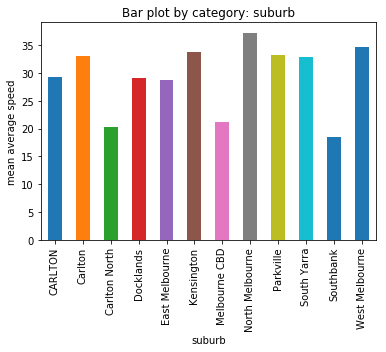

In [26]:
#Q3.1.a
bygroup = traffic.groupby('suburb')
picture=bygroup['average_speed'].mean().plot(kind='bar')
plt.title('Bar plot by category: suburb')
plt.xlabel('suburb')
plt.ylabel('mean average speed')

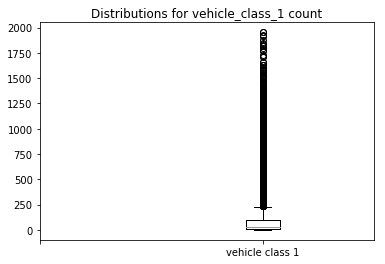

In [47]:
## Q3.1.b

s1=traffic['vehicle_class_1']
s1 = s1.dropna()
#s2=traffic['bike']
#plt.figure(figsize=(20, 40))
plt.boxplot(s1)
plt.xticks(range(2),["", "vehicle class 1"])
plt.title('Distributions for vehicle_class_1 count')
plt.show()

From the bar chart, average speeds lowest in Southbank, Melbourne CBD and Carlton North.  From Boxplot, very high variance in data, few vehicles on the road during most survey entries but some periods of very high congestion (up to almost 2000 cars in an hour).

In [28]:
## Q 3.2 & 3.3
special_traffic = pd.read_csv("special_traffic.csv")

In [29]:
# Q3.2 & 3.3
## Feature scaling for all parts Q 3.2 & 3.3
from sklearn.preprocessing import StandardScaler

special_traffic.speed_limit = special_traffic.speed_limit.astype(float)

features = special_traffic[['maximum_speed', 'speed_limit','average_speed','bike','motorcycle', 'vehicle_class_1', 'vehicle_class_2', 'vehicle_class_3', 'vehicle_class_4', 'vehicle_class_5',
                    'vehicle_class_6', 'vehicle_class_7', 'vehicle_class_8', 'vehicle_class_9', 'vehicle_class_10',
                    'vehicle_class_11', 'vehicle_class_12', 'vehicle_class_13']]

scaler = StandardScaler().fit(features.values)
feature_scaled = scaler.transform(features.values)


In [30]:
from scipy.spatial.distance import pdist, squareform
def VAT(R):
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)
    
    I = i[j]
    del J[I]
    
    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    C = [1,1]

    for r in range(2, N-1):
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)
        y = np.min(y)
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])

    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)

    I.extend(J)
    C.extend(i)

    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    return RV.tolist(), C, I

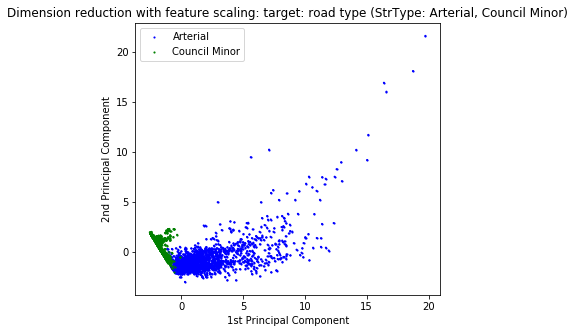

In [31]:
#Q3.2a
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
principalComponents2_a = pca2.fit_transform(feature_scaled)

dim_pca = principalComponents2_a.copy()

y = special_traffic['StrType']
palette= ['blue', 'green']
labels = ['Arterial', 'Council Minor']
legend = zip(palette, labels)

colors=y.replace(to_replace=labels,value=palette).tolist()
y_pca = pd.DataFrame({'lab': y, 'col':colors})

fig = plt.figure(figsize=(12,5))
rows = 1 
cols = 2

# setting the plot along the first two PCA for reduced feature matrix
fig.add_subplot(rows,cols,1)
plt.scatter(principalComponents2_a[:,0],principalComponents2_a[:,1], s=5, marker='.', c=colors)
for col, lab in legend:
    dim_pca_per_label = dim_pca[y_pca['lab'] == lab]
    plt.scatter(dim_pca_per_label[:,0],dim_pca_per_label[:,1], s=5, marker='.', c=col, label = lab)
plt.xlabel('1st Principal Component', fontsize=10)
plt.ylabel('2nd Principal Component', fontsize=10)
plt.title('Dimension reduction with feature scaling: target: road type (StrType: Arterial, Council Minor)')
plt.legend()
#plt.xlim([-5,10])
#plt.ylim([-5,10])
plt.show()

In [32]:
## 3.2.b
## the PCA2 separates the two road types well.

In [33]:
for col ,lab in legend:
    print("legend: %s, %s", (col, lab))

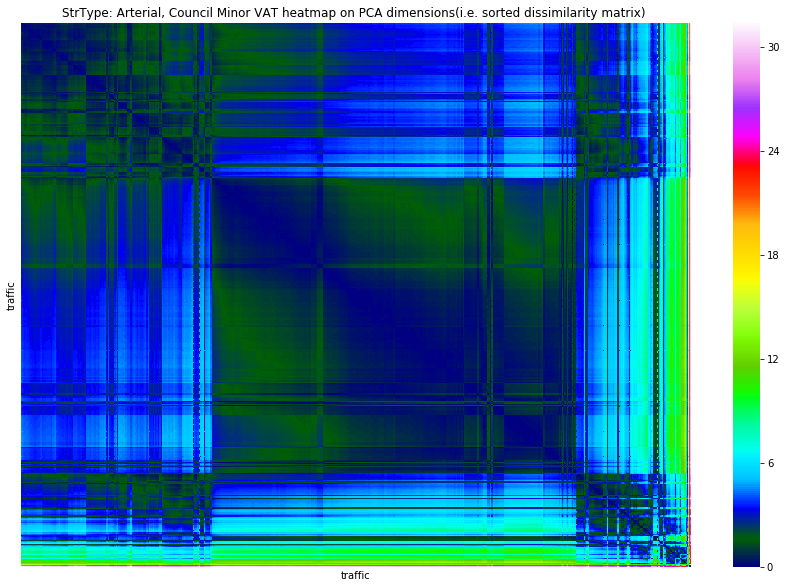

In [34]:
##  Q3.2.c VAT on PCA2
import numpy as np

num_samples = 1000
idx = np.random.randint(0,len(principalComponents2_a),size=num_samples)
comp_sample_pca = principalComponents2_a[idx,:]

# passing scaled feature matrix to provided VAT helper function
sorted_dis_mat, R, I = VAT(comp_sample_pca)

# setting parameters for plot
fig = plt.figure(figsize=(15,10))
rows = 1 
cols = 1

fig.add_subplot(rows,cols,1)
# heatmap for ordered similarity matrix
vat_map = sns.heatmap(sorted_dis_mat, cmap='gist_ncar', xticklabels=False, yticklabels=False)
#vat_map = sns.heatmap(sorted_dis_mat,  xticklabels=False, yticklabels=False)
vat_map.set(xlabel='traffic', ylabel='traffic')
plt.title('StrType: Arterial, Council Minor VAT heatmap on PCA dimensions(i.e. sorted dissimilarity matrix) ')
plt.show()

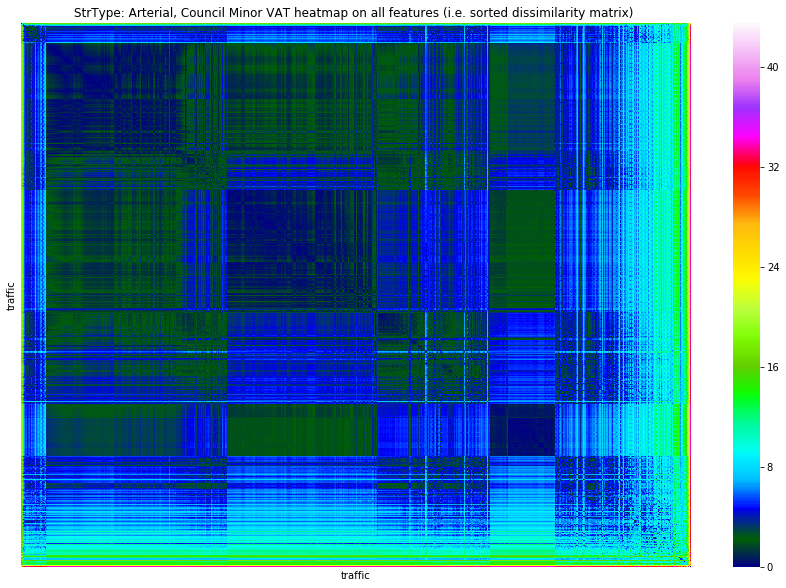

In [48]:
## Q 3.2.c VAT on all features scaled.

num_samples = 1000
idx = np.random.randint(0,len(feature_scaled),size=num_samples)
#comp_sample_org = feature_scaled[idx,:]
comp_sample_org = feature_scaled

# passing scaled feature matrix to provided VAT helper function
sorted_dis_mat, R, I = VAT(comp_sample_org)

# setting parameters for plot
fig = plt.figure(figsize=(15,10))
rows = 1 
cols = 1

fig.add_subplot(rows,cols,1)
# heatmap for ordered similarity matrix
vat_map = sns.heatmap(sorted_dis_mat, cmap='gist_ncar', xticklabels=False, yticklabels=False)
#vat_map = sns.heatmap(sorted_dis_mat,  xticklabels=False, yticklabels=False)
vat_map.set(xlabel='traffic', ylabel='traffic')
plt.title('StrType: Arterial, Council Minor VAT heatmap on all features (i.e. sorted dissimilarity matrix) ')
plt.show()




In [36]:
#Q3.2.d
## PCA separates the data with respect to the two road type (StrType) well.  
## the VAT of the 2 PCA components shows clear three strong clusrers
## As PCA gives 2 new authogonal features, clustering tendency in the VAT plot is clearer.
## the VAT of of all features show more smaller clusters at high dimensional space (all features).  
## Two VATs are very different kinds of clusters.

In [37]:
#Q3.3
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

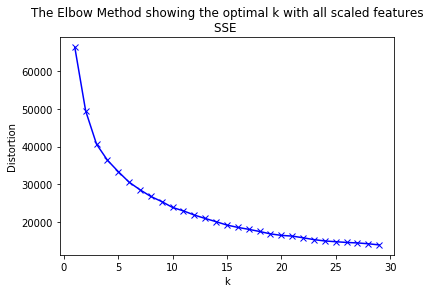

In [38]:
#Q3.3.a

# k means determine k
distortions = []
fitness= []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(feature_scaled)
    #kmeanModel.fit(comp_sample_org)
    #distortions.append(sum(np.min(cdist(feature_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / comp_sample_org.shape[0])
    distortions.append(kmeanModel.inertia_)
    fitness.append(kmeanModel.score(feature_scaled))
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
#plt.plot(K, fitness, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
#plt.ylabel('score')
plt.title('The Elbow Method showing the optimal k with all scaled features\nSSE ')
plt.show()

# Optimal k is difficult to determine exactly, but appears around k=3.  
# This matches with the VAT for the PCA reduced dataset.

Text(0, 0.5, 'data count')

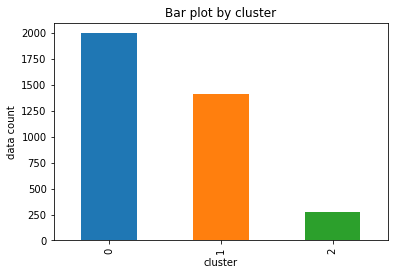

In [39]:
#Q3.3.b
k = 3
kmeanModel = KMeans(n_clusters=k).fit(feature_scaled)
labels = kmeanModel.labels_
clusters = pd.DataFrame({'cluster': labels, 'StrType': special_traffic['StrType']})
clusters['cluster_str'] = clusters['cluster'].astype(str)

bygroup = clusters.groupby(['cluster_str'])
picture=bygroup['cluster'].count().plot(kind='bar')
plt.title('Bar plot by cluster')
plt.xlabel('cluster')
plt.ylabel('data count')

In [40]:
## 3 possible solutions to Q3.3.c and Q3.3.d

Text(0, 0.5, 'data count')

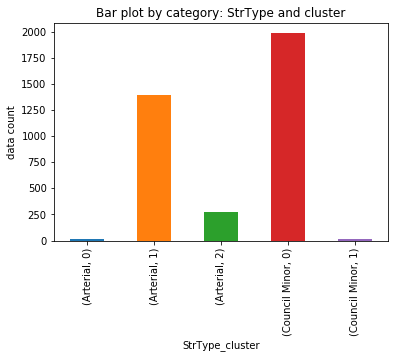

In [41]:
# solutions -A
# Q3.3.c
## a bar plot
## group by 'StrType' and 'cluster_str'
## aggregate groups with count function.
## there should be a dominate group per StrType.
#Q 3.3.d
bygroup = clusters.groupby(['StrType', 'cluster_str'])
picture=bygroup['cluster'].count().plot(kind='bar')
plt.title('Bar plot by category: StrType and cluster')
plt.xlabel('StrType_cluster')
plt.ylabel('data count')

# the k-means model roughly clusters points of the same StrType value in the same cluster.
# Cluster 0 is mainly Council Minor
# Cluster 1 is also mainly Arterial but is smaller than cluster 2.
# Cluster 2 is mainly Arterial

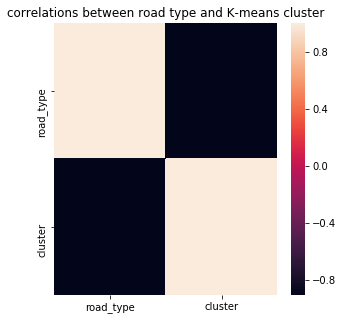

In [42]:
# solutions -B
#Q3.3.c
## A heatmap: 
## StrType is converted to integer: 1, 2, 3, 4
## heat map of the correlations between StrType and Cluster
## there colours in the off diagnal matrix should correspond to high correlation. Black colour is close to -1.  
## here the sign does not matter.

## Q3.3.d
y = special_traffic['StrType']
num= [0, 1]
roadTypeInt=y.replace(to_replace=['Arterial', 'Council Minor'],value=num).tolist()

df = pd.DataFrame({'road_type':roadTypeInt, 'cluster': labels})
fig = plt.figure(figsize=(5,5))
rows = 1 
cols = 1

fig.add_subplot(rows,cols,1)
# heatmap 
sns.heatmap(df.corr())
plt.title('correlations between road type and K-means cluster')
plt.show()


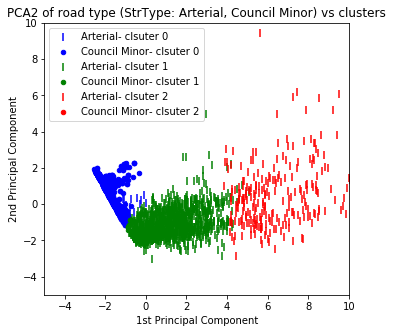

In [43]:
# solutions -C
# Q 3.3.c
# modify scatter plot of the 2 principal components:
# color of the point by cluster value and marker type by StrType.
# if same colour points tend to have the same marker, K-means tends to group same road type into the same cluster.

# Q 3.3.d
# in the code and output below, 
# Council Minor is '.' and mostly blue: cluster 1.
# Arterial is '|', it is divided into 2 clusters: red and green.  
# The red is minority, so Arterial is mainly in the same cluster.  
# if students say: 
# K-mean not working well for Arterial, it is an excellent answer, it is the limitation of K-means.


labels = kmeanModel.labels_
clusters = pd.DataFrame({'cluster': labels, 'StrType': special_traffic['StrType']})
clusters['cluster_str'] = clusters['cluster'].astype(str)

#y = clusters['cluster']
palette= ['blue','green', 'red']
legend_cls = [0, 1, 2]
legend_strtype = ['Arterial', 'Council Minor']
legend_marker = ['|', '.']


colors=clusters['cluster'].replace(to_replace=legend_cls,value=palette).tolist()
markers=clusters['StrType'].replace(to_replace=legend_strtype,value=legend_marker).tolist()
clusters['color'] = colors
clusters['marker'] = markers

dim_pca = principalComponents2_a.copy()

# draw
## draw
fig = plt.figure(figsize=(12,5))
rows = 1 
cols = 2

fig.add_subplot(rows,cols,1)
for color, cls in zip(palette, legend_cls):
    for marker, strType in zip(legend_marker, legend_strtype):
        part_dim_pca = dim_pca[(clusters['cluster'] == cls) & (clusters['StrType'] == strType)]
        lab = strType + '- clsuter ' + str(cls)
        plt.scatter(part_dim_pca[:,0],part_dim_pca[:,1], s=80, marker=marker, c=color, label = lab)

# marker '|' is Arterial.
plt.xlabel('1st Principal Component', fontsize=10)
plt.ylabel('2nd Principal Component', fontsize=10)
plt.title('PCA2 of road type (StrType: Arterial, Council Minor) vs clusters')
plt.legend()
plt.xlim([-5,10])
plt.ylim([-5,10])
plt.show()


In [44]:
#######################################